In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("50_Startups.csv")

In [3]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [5]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [6]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [7]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
independent.head(5)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [8]:
dependent=dataset[['Profit']]
dependent.head(5)

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(independent,dependent,test_size=0.30, random_state=0) 

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='best')
regressor.fit(X_train,y_train)

,criterion,'poisson'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

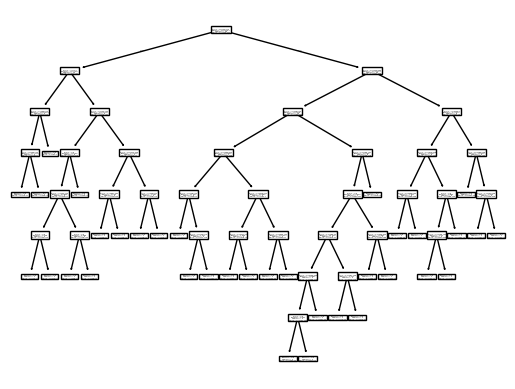

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show

In [40]:
y_pred=regressor.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred) 
r_score

0.9114663290616678